# Nobel Laureates

Analysis of data on Nobel Laureates scraped from nobelprize.org and available from Kaggle.com: https://www.kaggle.com/nobelfoundation/nobel-laureates


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.0f}'.format

Taking a peek at the first row of the data:

In [3]:
!head -n 1 archive.csv

Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country


In [4]:
nobeldf = pd.read_csv("archive.csv", parse_dates = ["Birth Date", "Death Date"])

In [5]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
dtypes: datetime64[ns](1), int64(2), object(15)
memory usage: 136.3+ KB


*** The Birth Date didn't get converted to datetime because of missing values. ***

In [6]:
nobeldf.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Index columns that we are going to need for the next few lines of code:

In [7]:
nobeldf["Laureate Type"].value_counts()

Individual      939
Organization     30
Name: Laureate Type, dtype: int64

In [8]:
columns = ["Year", "Category", "Birth Date", "Sex", "Organization Name", "Organization Country", "Death Date"]

In [9]:
nobeldf2 = nobeldf[columns]

In [10]:
nobeldf2.head()

,Year,Category,Birth Date,Sex,Organization Name,Organization Country,Death Date
0,1901,Chemistry,1852-08-30,Male,Berlin University,Germany,1911-03-01
1,1901,Literature,1839-03-16,Male,NaN,NaN,1907-09-07
2,1901,Medicine,1854-03-15,Male,Marburg University,Germany,1917-03-31
3,1901,Peace,1828-05-08,Male,NaN,NaN,1910-10-30
4,1901,Peace,1822-05-20,Male,NaN,NaN,1912-06-12


In [11]:
nobeldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 7 columns):
Year                    969 non-null int64
Category                969 non-null object
Birth Date              969 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 53.1+ KB


### Missing data

From above, we can see that there are missing data under "Sex", "Organization Name", "Organization Country", and "Death Date"

### How many categories and how are they distributed?

In [12]:
nobeldf.Category.value_counts()

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

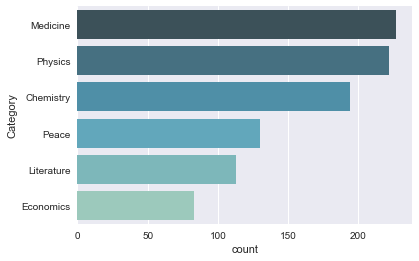

In [13]:
sns.countplot(y='Category', data= nobeldf, 
              order=nobeldf.Category.value_counts().index,
              palette='GnBu_d')
sns.despine();
plt.savefig('category.png')

In [14]:
sns.set(style="white")

In [15]:
!open 'category.png'

## Males vs. Females

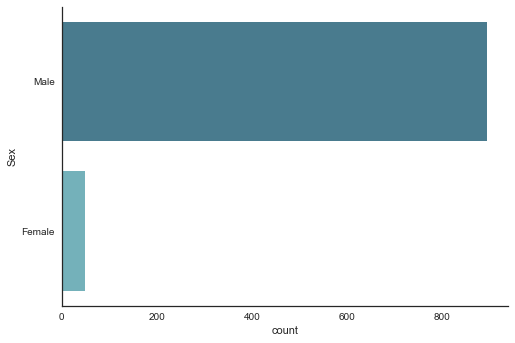

In [16]:
sns.countplot(y="Sex", data=nobeldf,
             palette='GnBu_d');
sns.despine()
plt.savefig('sex.png')

In [17]:
!open 'sex.png'

## Awards by Country

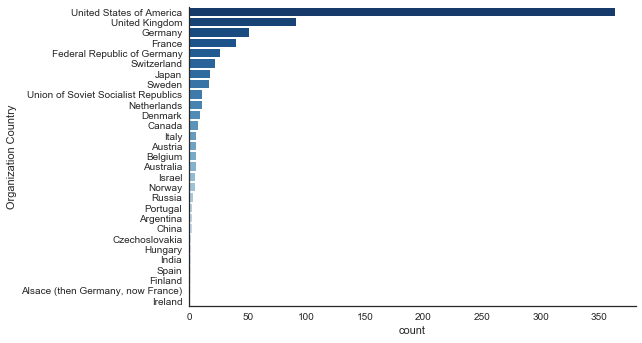

In [18]:
sns.countplot(y='Organization Country',
              data=nobeldf,
              order=nobeldf['Organization Country'].value_counts().index,
              palette='Blues_r')
sns.despine()
sns.set(style='white')
plt.savefig('countries.png')

In [19]:
!open 'countries.png'

## Age of nobel laureates (at the time of award)

- Calculate the age using "Year" and "Birth Date"

But there are missing values:

In [20]:
nobeldf2.isnull().sum()

Year                      0
Category                  0
Birth Date                0
Sex                      26
Organization Name       247
Organization Country    253
Death Date              352
dtype: int64

In [21]:
nobeldf2["Birth Date"].value_counts().head()

nan           29
1930-03-15     3
1938-03-07     3
1952-11-09     3
1881-03-23     3
Name: Birth Date, dtype: int64

--> Replace "nan" with 0s:

In [22]:
nobeldf2 = nobeldf2.replace(to_replace = "nan", value=0)

Create new column, "Birth Year":

In [23]:
nobeldf2["Birth Year"] = nobeldf2["Birth Date"].str[0:4]

In [24]:
nobeldf2['Birth Year'].head()

0    1852
1    1839
2    1854
3    1828
4    1822
Name: Birth Year, dtype: object

In [25]:
nobeldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 8 columns):
Year                    969 non-null int64
Category                969 non-null object
Birth Date              969 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Birth Year              940 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 60.6+ KB


Convert "Birth Year" column from str to numeric:

In [26]:
nobeldf2["Birth Year"] = pd.to_numeric(nobeldf2["Birth Year"])

In [27]:
nobeldf2["Birth Year"].head()

0   1,852
1   1,839
2   1,854
3   1,828
4   1,822
Name: Birth Year, dtype: float64

In [28]:
nobeldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 8 columns):
Year                    969 non-null int64
Category                969 non-null object
Birth Date              969 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Birth Year              940 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 60.6+ KB


Calculation of age during awarding of Nobel:

In [29]:
nobeldf2["Age"] = nobeldf2["Year"] - nobeldf2["Birth Year"]

In [30]:
nobeldf2.Age.value_counts().head()

61    35
63    34
64    34
56    33
54    33
Name: Age, dtype: int64

In [31]:
nobeldf2.Age.describe()

count   940
mean     59
std      12
min      17
25%      50
50%      60
75%      69
max      90
Name: Age, dtype: float64

#### Distribution of age of Nobel Prize awardees

/Users/alonavarshal/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


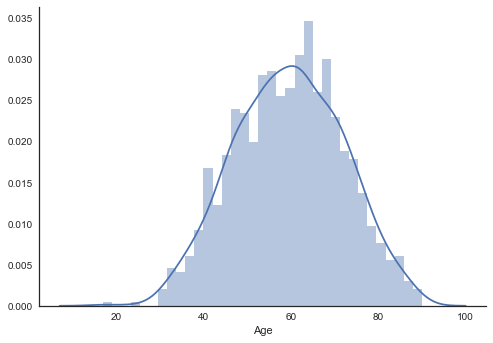

In [32]:
sns.distplot(nobeldf2["Age"].dropna(), bins=35)
sns.set(style='white')
sns.despine();

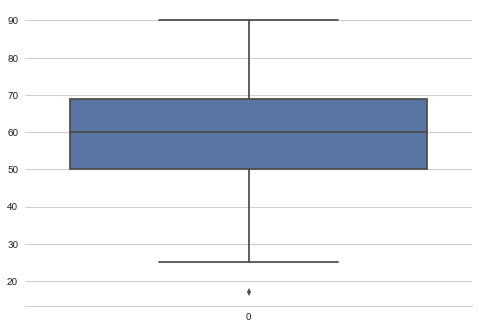

In [33]:
sns.set_style("whitegrid")
sns.boxplot(data=nobeldf2.Age)
sns.despine(left=True)

## You are most likely to be awarded a Nobel Prize if you are:

1. a male
2. in the area of medicine
3. living in the USA
4. around 60 years old

In [34]:
nobeldf.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## Specializations of countries:

In [35]:
top10 = nobeldf['Organization Country'].value_counts()[:10].index
top10

Index(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Federal Republic of Germany', 'Switzerland', 'Japan', 'Sweden',
       'Union of Soviet Socialist Republics', 'Netherlands'],
      dtype='object')

In [36]:
top10 = [x for x in top10]

In [37]:
top10

['United States of America',
 'United Kingdom',
 'Germany',
 'France',
 'Federal Republic of Germany',
 'Switzerland',
 'Japan',
 'Sweden',
 'Union of Soviet Socialist Republics',
 'Netherlands']

In [38]:
sp = nobeldf.groupby("Organization Country")["Category"].value_counts().sort_values(ascending=False)

In [39]:
sp

Organization Country               Category 
United States of America           Medicine     112
                                   Physics      104
                                   Chemistry     79
                                   Economics     65
United Kingdom                     Medicine      31
                                               ... 
Italy                              Chemistry      1
Hungary                            Medicine       1
India                              Physics        1
Ireland                            Physics        1
Alsace (then Germany, now France)  Physics        1
Name: Category, dtype: int64

In [40]:
sptop = sp[top10]

In [41]:
sptop = sptop.unstack("Category")

In [42]:
sptop

Category,Chemistry,Economics,Medicine,Peace,Physics
Organization Country,,,,,
United States of America,79,65,112,3,104
United Kingdom,28,6,31,nan,26
Germany,27,nan,10,nan,14
France,11,2,10,1,16
Federal Republic of Germany,11,1,7,nan,7
Switzerland,6,nan,8,nan,8
Japan,5,nan,3,nan,10
Sweden,5,1,7,nan,4
Union of Soviet Socialist Republics,1,1,nan,nan,9


In [43]:
sptop = sptop.reset_index()

In [44]:
sptop

Category,Organization Country,Chemistry,Economics,Medicine,Peace,Physics
0,United States of America,79,65,112,3,104
1,United Kingdom,28,6,31,nan,26
2,Germany,27,nan,10,nan,14
3,France,11,2,10,1,16
4,Federal Republic of Germany,11,1,7,nan,7
5,Switzerland,6,nan,8,nan,8
6,Japan,5,nan,3,nan,10
7,Sweden,5,1,7,nan,4
8,Union of Soviet Socialist Republics,1,1,nan,nan,9
9,Netherlands,1,1,2,nan,7


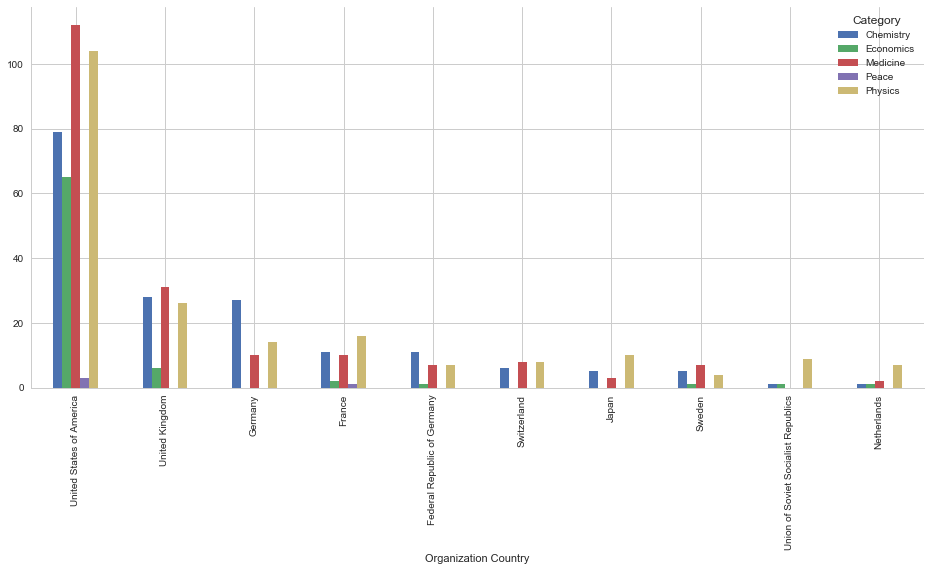

In [45]:
sptop.plot(kind="bar", x="Organization Country", figsize=(16, 7), grid=None)
sns.set(style='white')
sns.despine();

## Analysis of Motivation Column

In [46]:
nobeldf.Motivation.str.count('\w').describe()

count   881
mean     84
std      35
min      18
25%      57
50%      80
75%     105
max     279
Name: Motivation, dtype: float64

In [47]:
chemistry = nobeldf[nobeldf.Category == "Chemistry"]

In [48]:
chemistry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 960
Data columns (total 18 columns):
Year                    194 non-null int64
Category                194 non-null object
Prize                   194 non-null object
Motivation              194 non-null object
Prize Share             194 non-null object
Laureate ID             194 non-null int64
Laureate Type           194 non-null object
Full Name               194 non-null object
Birth Date              194 non-null object
Birth City              194 non-null object
Birth Country           194 non-null object
Sex                     194 non-null object
Organization Name       192 non-null object
Organization City       188 non-null object
Organization Country    189 non-null object
Death Date              122 non-null datetime64[ns]
Death City              119 non-null object
Death Country           119 non-null object
dtypes: datetime64[ns](1), int64(2), object(15)
memory usage: 28.8+ KB


In [49]:
chemistry.Motivation.str.count('\w').describe()

count   194
mean     75
std      33
min      23
25%      52
50%      66
75%      94
max     192
Name: Motivation, dtype: float64

In [50]:
chemistry.Motivation

0      "in recognition of the extraordinary services ...
6      "in recognition of the extraordinary services ...
13     "in recognition of the extraordinary services ...
20     "in recognition of his services in the discove...
26     "in recognition of his services in the advance...
                             ...                        
948              "for mechanistic studies of DNA repair"
949              "for mechanistic studies of DNA repair"
958    "for the design and synthesis of molecular mac...
959    "for the design and synthesis of molecular mac...
960    "for the design and synthesis of molecular mac...
Name: Motivation, dtype: object

In [51]:
allmotivation = ' '.join(chemistry.Motivation)

In [52]:
import wordcloud

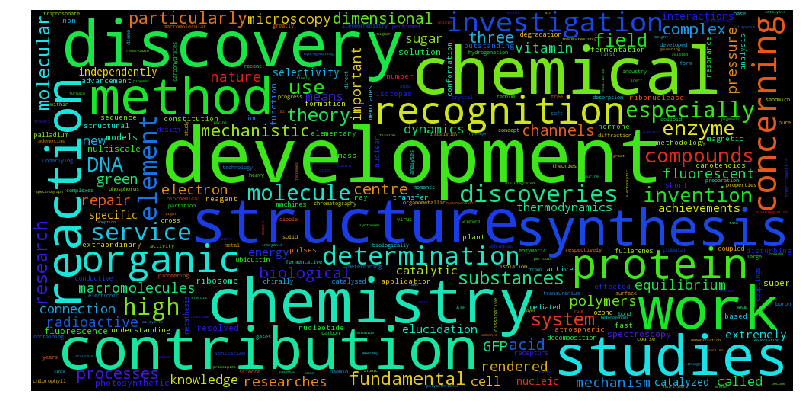

In [53]:
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=300,
                            relative_scaling=.5).generate(allmotivation)
plt.figure(figsize=(16, 7))
plt.axis('off')
plt.savefig('chemistrynobel.png')
plt.imshow(cloud);

In [54]:
!open chemistrynobel.png

wordcloud for all categories

In [56]:
nobelmotivation = ' '.join(nobeldf.Motivation.dropna())

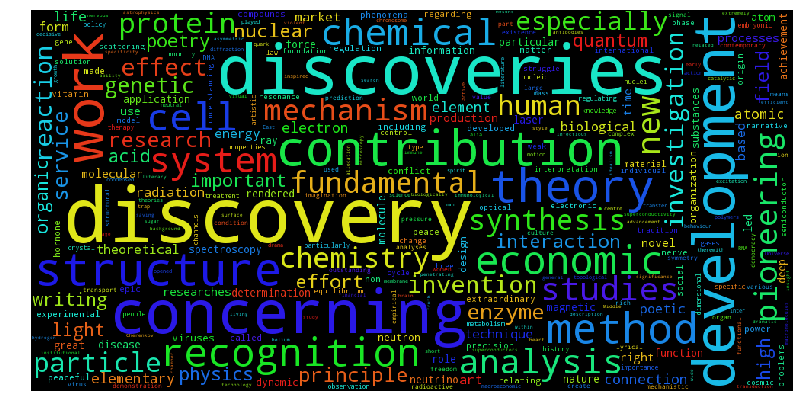

In [57]:
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=300,
                            relative_scaling=.5).generate(nobelmotivation)
plt.figure(figsize=(16, 7))
plt.axis('off')
plt.savefig('chemistrynobel.png')
plt.imshow(cloud);

## Analysis of Prize Share column

In [58]:
nobeldf["Prize Share"].describe()

count     969
unique      4
top       1/1
freq      351
Name: Prize Share, dtype: object

Mapping the results into a map

In [59]:
sp

Organization Country               Category 
United States of America           Medicine     112
                                   Physics      104
                                   Chemistry     79
                                   Economics     65
United Kingdom                     Medicine      31
                                               ... 
Italy                              Chemistry      1
Hungary                            Medicine       1
India                              Physics        1
Ireland                            Physics        1
Alsace (then Germany, now France)  Physics        1
Name: Category, dtype: int64

In [60]:
spdf = sp.unstack("Category")

In [61]:
spdf

Category,Chemistry,Economics,Medicine,Peace,Physics
Organization Country,,,,,
"Alsace (then Germany, now France)",nan,nan,nan,nan,1
Argentina,1,nan,1,nan,nan
Australia,nan,nan,5,nan,1
Austria,1,nan,4,nan,1
Belgium,1,nan,4,nan,1
...,...,...,...,...,...
Sweden,5,1,7,nan,4
Switzerland,6,nan,8,nan,8
Union of Soviet Socialist Republics,1,1,nan,nan,9


In [64]:
spdf = spdf.reset_index()

In [65]:
spdf

Category,Organization Country,Chemistry,Economics,Medicine,Peace,Physics
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1
1,Argentina,1,nan,1,nan,nan
2,Australia,nan,nan,5,nan,1
3,Austria,1,nan,4,nan,1
4,Belgium,1,nan,4,nan,1
...,...,...,...,...,...,...
24,Sweden,5,1,7,nan,4
25,Switzerland,6,nan,8,nan,8
26,Union of Soviet Socialist Republics,1,1,nan,nan,9
27,United Kingdom,28,6,31,nan,26


In [69]:
countries = spdf["Organization Country"].unique()

In [70]:
countries

array(['Alsace (then Germany, now France)', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Canada', 'China', 'Czechoslovakia',
       'Denmark', 'Federal Republic of Germany', 'Finland', 'France',
       'Germany', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Netherlands', 'Norway', 'Portugal', 'Russia', 'Spain',
       'Sweden', 'Switzerland', 'Union of Soviet Socialist Republics',
       'United Kingdom', 'United States of America'], dtype=object)

Countries printed to copy and paste on geocoder:

http://www.gpsvisualizer.com/geocoder/

In [71]:
for country in countries:
    print(country)

Alsace (then Germany, now France)
Argentina
Australia
Austria
Belgium
Canada
China
Czechoslovakia
Denmark
Federal Republic of Germany
Finland
France
Germany
Hungary
India
Ireland
Israel
Italy
Japan
Netherlands
Norway
Portugal
Russia
Spain
Sweden
Switzerland
Union of Soviet Socialist Republics
United Kingdom
United States of America


Geocodes saved into a csv file (using sublime) and read to pandas below:

In [72]:
countryloc = pd.read_csv("countryloc.csv")

In [73]:
countryloc

,latitude,longitude,name,desc,color,source,precision
0,-35,-65,Argentina,AR,nan,MapQuest Open,country
1,-25,135,Australia,AU,nan,MapQuest Open,country
2,47,13,Austria,AT,nan,MapQuest Open,country
3,51,5,Belgium,BE,nan,MapQuest Open,country
4,61,-108,Canada,CA,nan,MapQuest Open,country
...,...,...,...,...,...,...,...
21,40,-4,Spain,ES,nan,MapQuest Open,country
22,60,15,Sweden,SE,nan,MapQuest Open,country
23,47,8,Switzerland,CH,nan,MapQuest Open,country
24,55,-3,United Kingdom,GB,nan,MapQuest Open,country


In [74]:
countryloc["Organization Country"] = countryloc.name

In [75]:
countryloc

,latitude,longitude,name,desc,color,source,precision,Organization Country
0,-35,-65,Argentina,AR,nan,MapQuest Open,country,Argentina
1,-25,135,Australia,AU,nan,MapQuest Open,country,Australia
2,47,13,Austria,AT,nan,MapQuest Open,country,Austria
3,51,5,Belgium,BE,nan,MapQuest Open,country,Belgium
4,61,-108,Canada,CA,nan,MapQuest Open,country,Canada
...,...,...,...,...,...,...,...,...
21,40,-4,Spain,ES,nan,MapQuest Open,country,Spain
22,60,15,Sweden,SE,nan,MapQuest Open,country,Sweden
23,47,8,Switzerland,CH,nan,MapQuest Open,country,Switzerland
24,55,-3,United Kingdom,GB,nan,MapQuest Open,country,United Kingdom


In [76]:
countryloc2 = countryloc[["Organization Country", "longitude", "latitude"]]

In [77]:
countryloc2

,Organization Country,longitude,latitude
0,Argentina,-65,-35
1,Australia,135,-25
2,Austria,13,47
3,Belgium,5,51
4,Canada,-108,61
...,...,...,...
21,Spain,-4,40
22,Sweden,15,60
23,Switzerland,8,47
24,United Kingdom,-3,55


Merging the data

In [108]:
spdfloc = pd.merge(spdf, countryloc2, on="Organization Country", how="outer")

In [109]:
spdfloc

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1,nan,nan
1,Argentina,1,nan,1,nan,nan,-65,-35
2,Australia,nan,nan,5,nan,1,135,-25
3,Austria,1,nan,4,nan,1,13,47
4,Belgium,1,nan,4,nan,1,5,51
...,...,...,...,...,...,...,...,...
24,Sweden,5,1,7,nan,4,15,60
25,Switzerland,6,nan,8,nan,8,8,47
26,Union of Soviet Socialist Republics,1,1,nan,nan,9,nan,nan
27,United Kingdom,28,6,31,nan,26,-3,55


In [110]:
list(spdfloc["Organization Country"])

['Alsace (then Germany, now France)',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Canada',
 'China',
 'Czechoslovakia',
 'Denmark',
 'Federal Republic of Germany',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'India',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Netherlands',
 'Norway',
 'Portugal',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Union of Soviet Socialist Republics',
 'United Kingdom',
 'United States of America']

In [111]:
spdfloc.loc[spdfloc["Organization Country"] == "Russia"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
22,Russia,nan,nan,1,nan,2,98,65


In [112]:
spdfloc.loc[spdfloc["Organization Country"] == "Union of Soviet Socialist Republics"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
26,Union of Soviet Socialist Republics,1,1,nan,nan,9,nan,nan


In [124]:
spdfloc.loc[spdfloc["Organization Country"]=="Russia", ["latitude", "longitude"]]

,latitude,longitude
22,65,98


In [115]:
spdfloc2 = spdfloc

In [125]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"] = spdfloc.loc[spdfloc["Organization Country"]=="Russia", "latitude"] 

In [128]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"]

26   nan
Name: latitude, dtype: float64

In [138]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"] = 65

In [139]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"]

26   65
Name: latitude, dtype: float64

In [140]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "longitude"] = 98

In [133]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"] = spdfloc.loc[spdfloc["Organization Country"]=="Russia", "latitude"]

In [141]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", "latitude"]

26   65
Name: latitude, dtype: float64

In [142]:
spdfloc.loc[spdfloc["Organization Country"]=="Russia", "latitude"]

22   65
Name: latitude, dtype: float64

In [143]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Russia", ["latitude", "longitude"]]

,latitude,longitude
22,65,98


In [144]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Union of Soviet Socialist Republics", ["latitude", "longitude"]]

,latitude,longitude
26,65,98


In [87]:
spdfloc.loc[spdfloc["Organization Country"] == "Federal Republic of Germany"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
9,Federal Republic of Germany,11,1,7,nan,7,nan,nan


In [88]:
spdfloc.loc[spdfloc["Organization Country"] == "Germany"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
12,Germany,27,nan,10,nan,14,10,51


In [145]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Federal Republic of Germany", "longitude"] = 10

In [146]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Federal Republic of Germany", "latitude"] = 51

In [147]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Federal Republic of Germany", ["longitude", "latitude"]] 

,longitude,latitude
9,10,51


In [89]:
spdfloc.loc[spdfloc["Organization Country"] == "France"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
11,France,11,2,10,1,16,2,47


In [90]:
spdfloc.loc[spdfloc["Organization Country"] == "Alsace (then Germany, now France)"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1,nan,nan


In [148]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Alsace (then Germany, now France)", "longitude"] = 2

In [149]:
spdfloc2.loc[spdfloc2["Organization Country"]=="Alsace (then Germany, now France)", "latitude"] = 47

In [150]:
spdfloc.loc[spdfloc["Organization Country"] == "Alsace (then Germany, now France)"]

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1,2,47


In [151]:
spdfloc2

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",nan,nan,nan,nan,1,2,47
1,Argentina,1,nan,1,nan,nan,-65,-35
2,Australia,nan,nan,5,nan,1,135,-25
3,Austria,1,nan,4,nan,1,13,47
4,Belgium,1,nan,4,nan,1,5,51
...,...,...,...,...,...,...,...,...
24,Sweden,5,1,7,nan,4,15,60
25,Switzerland,6,nan,8,nan,8,8,47
26,Union of Soviet Socialist Republics,1,1,nan,nan,9,98,65
27,United Kingdom,28,6,31,nan,26,-3,55


In [152]:
spdfloc2 = spdfloc2.fillna(0)

In [153]:
spdfloc2

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",0,0,0,0,1,2,47
1,Argentina,1,0,1,0,0,-65,-35
2,Australia,0,0,5,0,1,135,-25
3,Austria,1,0,4,0,1,13,47
4,Belgium,1,0,4,0,1,5,51
...,...,...,...,...,...,...,...,...
24,Sweden,5,1,7,0,4,15,60
25,Switzerland,6,0,8,0,8,8,47
26,Union of Soviet Socialist Republics,1,1,0,0,9,98,65
27,United Kingdom,28,6,31,0,26,-3,55


In [155]:
spdfloc2.to_csv("nobellistloc.csv")

In [1]:
import pandas as pd

In [2]:
spdfloc3 = pd.read_csv("nobellistloc.csv")

In [3]:
spdfloc3

,Unnamed: 0,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,0,"Alsace (then Germany, now France)",0.0,0.0,0.0,0.0,1.0,2.000000,47.000000
1,1,Argentina,1.0,0.0,1.0,0.0,0.0,-65.241974,-35.112487
2,2,Australia,0.0,0.0,5.0,0.0,1.0,134.755000,-24.776109
3,3,Austria,1.0,0.0,4.0,0.0,1.0,13.199959,47.200034
4,4,Belgium,1.0,0.0,4.0,0.0,1.0,4.666960,50.640735
5,5,Canada,3.0,0.0,2.0,0.0,2.0,-107.991707,61.066692
6,6,China,0.0,0.0,1.0,0.0,1.0,104.999927,35.000074
7,7,Czechoslovakia,1.0,0.0,0.0,0.0,0.0,-100.445882,39.783730
8,8,Denmark,1.0,1.0,4.0,0.0,3.0,10.333328,55.670249
9,9,Federal Republic of Germany,11.0,1.0,7.0,0.0,7.0,10.000000,51.000000


In [4]:
del spdfloc3["Unnamed: 0"]

In [5]:
spdfloc3

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude
0,"Alsace (then Germany, now France)",0.0,0.0,0.0,0.0,1.0,2.000000,47.000000
1,Argentina,1.0,0.0,1.0,0.0,0.0,-65.241974,-35.112487
2,Australia,0.0,0.0,5.0,0.0,1.0,134.755000,-24.776109
3,Austria,1.0,0.0,4.0,0.0,1.0,13.199959,47.200034
4,Belgium,1.0,0.0,4.0,0.0,1.0,4.666960,50.640735
5,Canada,3.0,0.0,2.0,0.0,2.0,-107.991707,61.066692
6,China,0.0,0.0,1.0,0.0,1.0,104.999927,35.000074
7,Czechoslovakia,1.0,0.0,0.0,0.0,0.0,-100.445882,39.783730
8,Denmark,1.0,1.0,4.0,0.0,3.0,10.333328,55.670249
9,Federal Republic of Germany,11.0,1.0,7.0,0.0,7.0,10.000000,51.000000


In [7]:
spdfloc3["Total"] = spdfloc3["Chemistry"] + spdfloc3["Economics"] + spdfloc3["Physics"] + spdfloc3["Peace"] + spdfloc3["Medicine"]

In [8]:
spdfloc3

,Organization Country,Chemistry,Economics,Medicine,Peace,Physics,longitude,latitude,Total
0,"Alsace (then Germany, now France)",0.0,0.0,0.0,0.0,1.0,2.000000,47.000000,1.0
1,Argentina,1.0,0.0,1.0,0.0,0.0,-65.241974,-35.112487,2.0
2,Australia,0.0,0.0,5.0,0.0,1.0,134.755000,-24.776109,6.0
3,Austria,1.0,0.0,4.0,0.0,1.0,13.199959,47.200034,6.0
4,Belgium,1.0,0.0,4.0,0.0,1.0,4.666960,50.640735,6.0
5,Canada,3.0,0.0,2.0,0.0,2.0,-107.991707,61.066692,7.0
6,China,0.0,0.0,1.0,0.0,1.0,104.999927,35.000074,2.0
7,Czechoslovakia,1.0,0.0,0.0,0.0,0.0,-100.445882,39.783730,1.0
8,Denmark,1.0,1.0,4.0,0.0,3.0,10.333328,55.670249,9.0
9,Federal Republic of Germany,11.0,1.0,7.0,0.0,7.0,10.000000,51.000000,26.0


In [9]:
spdfloc3.to_csv("nobellist.csv")